In [3]:
!pip install openai

In [4]:
!pip install requests


# Author: Somya Sachan
# Student ID: 100901887

This is an introductory cell authored by Somya Sachan (Student ID: 100901887). 

*Problem Statement:*

The objective of this code is to build a machine learning model that predicts the price of a house based on several numeric features. The dataset contains information about various attributes of houses, including the number of bedrooms, bathrooms, square footage of living space, square footage of the lot, number of floors, and the price in a string format. Additionally, there is a column called 'area_embedding' that contains a list of embedding values representing the area.

The problem at hand is to preprocess the dataset, convert the price column from a string format to numeric values, and use the given numeric features and area embeddings to train a machine learning model that can accurately predict the price of a house.

By solving this problem, we aim to develop a model that can assist in estimating house prices based on the provided features. This can be valuable for real estate agents, homebuyers, and sellers who seek an accurate pricing mechanism to guide their decisions.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load the data
data = pd.read_csv("dataset.csv")

columns = data.columns

# Print the column names
print(columns)


Index(['Address', 'AreaName', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'price '],
      dtype='object')



Preprocessing Data:

The first step in building a machine learning model is to preprocess the data. Preprocessing involves transforming the raw data into a format that is suitable for training the model. In this project, we will perform the following preprocessing steps:

1. Handling Missing Values: Check for missing values in the dataset and decide on an appropriate strategy to handle them. Missing values can be imputed or dropped depending on the extent of missingness and the nature of the data.

2. Converting Price to Numeric: The price column is currently in string format, such as "$320,000.00". We need to convert it into a numeric format to facilitate further analysis and model training. This will involve removing any special characters, such as dollar signs and commas, and converting the values to numeric format.

3. Scaling Numeric Features: Since the numeric features have different scales, it is important to apply scaling techniques to ensure that all features contribute equally to the model training. Common scaling techniques include standardization (mean = 0, standard deviation = 1) or normalization (scaling to a specified range, e.g., 0-1).

4. Processing Area Embeddings: The 'area_embedding' column contains a list of embedding values representing the area. We need to process this column and extract relevant information that can be used as input for the machine learning model. This may involve converting the list into separate columns or applying specific operations to extract meaningful features.

5. Handling Categorical Variables: If there are any categorical variables present in the dataset, we need to encode them into a numeric representation. This can be done using techniques such as one-hot encoding or label encoding, depending on the nature of the categorical variables.

6. Splitting the Dataset: Lastly, we will split the preprocessed dataset into training and testing subsets. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance. This split ensures that the model's performance can be assessed on unseen data.

By performing these preprocessing steps, we will have a clean and transformed dataset ready for training our machine learning model. This will help us build an accurate model for predicting house prices based on the given features and area embeddings.

In [2]:
import pandas as pd
import re
import nltk
import string
#import tiktoken
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from openai.embeddings_utils import get_embedding
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Assuming 'data' is your DataFrame
area_names = data['AreaName']

# Preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the preprocessed tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply text preprocessing to the 'AreaName' column
preprocessed_area_names = area_names.apply(preprocess_text)

# Print the preprocessed text
print(preprocessed_area_names)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\scorp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\scorp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\scorp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                 richview
1           chedoke park b
2        ainslie wood east
3                greenford
4                 downtown
               ...        
21608                     
21609                     
21610                     
21611                     
21612                     
Name: AreaName, Length: 21613, dtype: object


In [5]:
get_embedding('cat', engine = 'text-embedding-ada-002')

[-0.0070945825427770615,
 -0.017328109592199326,
 -0.009644086472690105,
 -0.03070768155157566,
 -0.012548675760626793,
 0.003105211304500699,
 -0.005113212391734123,
 -0.04121817275881767,
 -0.014629469253122807,
 -0.021376069635152817,
 0.019231360405683517,
 0.05087646469473839,
 -0.0012907310156151652,
 0.0024855893570929766,
 -0.03840590640902519,
 -0.006089693866670132,
 0.0355084203183651,
 -0.004697763826698065,
 0.0023630852811038494,
 -0.01342928409576416,
 -0.01891888678073883,
 0.009019138291478157,
 0.015893569216132164,
 -0.008713766001164913,
 -0.014672079123556614,
 0.007233065087348223,
 0.013031589798629284,
 -0.013365369290113449,
 0.002858427818864584,
 0.004861102905124426,
 0.0040266546420753,
 -0.01677417755126953,
 -0.015850959345698357,
 -0.04306461289525032,
 -0.027242060750722885,
 -0.004278764594346285,
 0.0080533092841506,
 -0.009984967298805714,
 0.022015219554305077,
 -0.009040444158017635,
 0.004900162108242512,
 0.00031890999525785446,
 -0.0122219985350

In [9]:
data.dropna(subset = ['AreaName'], inplace=True)

In [10]:
from tqdm import tqdm
area_embedding ={}
for area in tqdm(data['AreaName'].unique()):
    
    area_embedding[area] = get_embedding(area, engine = 'text-embedding-ada-002')
    


100%|████████████████████████████████████████████████████████████████████████████████| 448/448 [01:47<00:00,  4.17it/s]


Address        18653
AreaName       18669
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
price              0
dtype: int64

In [12]:
data['area_embedding'] = data['AreaName'].map(area_embedding)

In [13]:
data.head()

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,area_embedding
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,"$221,900.00","[-0.030425315722823143, -0.01921931654214859, ..."
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,"$538,000.00","[0.007827975787222385, 0.0003008331696037203, ..."
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,"$180,000.00","[-0.006282160524278879, 0.006124097388237715, ..."
3,"102 NEIL Avenue Hamilton, ON",Greenford,4,3.00,1960,5000,1.0,"$604,000.00","[0.0058920420706272125, -0.0037994785234332085..."
4,"#1409 - 230 King St Toronto, ON",Downtown,3,2.00,1680,8080,1.0,"$510,000.00","[-0.008423764258623123, 0.005288653541356325, ..."


In [14]:
data.columns

Index(['Address', 'AreaName', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'price ', 'area_embedding'],
      dtype='object')

In [ ]:
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'price ', 'area_embedding']

In [ ]:
"""
Combine area embeddings and numeric columns and give it to machine learning model for training
"""
embedding
numeric_columns
x = np.hstack([embeding, numeric])
y = data['price']


## train test split
# model


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ast import literal_eval

# Convert the 'area_embedding' column from string to list
#data['area_embedding'] = data['area_embedding'].apply(literal_eval)



In [17]:
data['area_embedding'].apply(np.array)

0       [-0.030425315722823143, -0.01921931654214859, ...
1       [0.007827975787222385, 0.0003008331696037203, ...
2       [-0.006282160524278879, 0.006124097388237715, ...
3       [0.0058920420706272125, -0.0037994785234332085...
4       [-0.008423764258623123, 0.005288653541356325, ...
                              ...                        
2955    [-0.013041816651821136, -0.012712644413113594,...
2956    [-0.013041816651821136, -0.012712644413113594,...
2957    [-0.0179444570094347, -0.004939728882163763, -...
2958    [-0.013041816651821136, -0.012712644413113594,...
2959    [-0.013041816651821136, -0.012712644413113594,...
Name: area_embedding, Length: 2944, dtype: object

In [24]:

# Extract the individual embeddings as separate columns
embedding_cols = ['embedding_{}'.format(i) for i in range(len(data['area_embedding'].iloc[0]))]
data[embedding_cols] = pd.DataFrame(data['area_embedding'].to_list(), index=data.index)

C:\Users\scorp\AppData\Local\Temp\ipykernel_18760\286225101.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[embedding_cols] = pd.DataFrame(data['area_embedding'].to_list(), index=data.index)
C:\Users\scorp\AppData\Local\Temp\ipykernel_18760\286225101.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[embedding_cols] = pd.DataFrame(data['area_embedding'].to_list(), index=data.index)
C:\Users\scorp\AppData\Local\Temp\ipykernel_18760\286225101.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually

In [25]:
data.head()

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,area_embedding,embedding_0,...,embedding_1526,embedding_1527,embedding_1528,embedding_1529,embedding_1530,embedding_1531,embedding_1532,embedding_1533,embedding_1534,embedding_1535
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,"$221,900.00","[-0.030425315722823143, -0.01921931654214859, ...",-0.030425,...,0.023787,-0.007247,0.006239,-0.023155,-0.025731,0.021590,0.004904,-0.017497,-0.024830,-0.014841
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,"$538,000.00","[0.007827975787222385, 0.0003008331696037203, ...",0.007828,...,-0.015734,0.000735,-0.015337,-0.033689,-0.000642,0.016472,0.006892,-0.019720,-0.018756,-0.013659
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,"$180,000.00","[-0.006282160524278879, 0.006124097388237715, ...",-0.006282,...,0.014582,-0.024254,-0.012685,-0.003598,-0.038366,0.011118,0.009477,-0.005203,-0.009383,-0.016371
3,"102 NEIL Avenue Hamilton, ON",Greenford,4,3.00,1960,5000,1.0,"$604,000.00","[0.0058920420706272125, -0.0037994785234332085...",0.005892,...,0.014903,-0.021784,0.027498,-0.001792,-0.018846,0.052851,0.010986,-0.019799,-0.000634,-0.016727
4,"#1409 - 230 King St Toronto, ON",Downtown,3,2.00,1680,8080,1.0,"$510,000.00","[-0.008423764258623123, 0.005288653541356325, ...",-0.008424,...,0.013709,-0.017819,0.002700,-0.029729,-0.035350,0.025304,-0.008299,-0.011641,-0.017452,-0.004612


In [29]:
data['price '] = data['price '].str.replace('$', '').str.replace(',', '').astype(float)


C:\Users\scorp\AppData\Local\Temp\ipykernel_18760\1388189971.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price '] = data['price '].str.replace('$', '').str.replace(',', '').astype(float)


In [27]:
data.columns

Index(['Address', 'AreaName', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'price ', 'area_embedding', 'embedding_0',
       ...
       'embedding_1526', 'embedding_1527', 'embedding_1528', 'embedding_1529',
       'embedding_1530', 'embedding_1531', 'embedding_1532', 'embedding_1533',
       'embedding_1534', 'embedding_1535'],
      dtype='object', length=1545)

Splitting and Training the Model

In this code snippet, we will split the dataset into training and testing sets, train a linear regression model, make predictions on the test set, and evaluate the model's performance using mean squared error (MSE).

Splitting the Data - 
We begin by splitting the data into features (X) and the target variable (y). The features include columns such as 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', and the 'area_embedding' columns.

Splitting into Training and Testing Sets - 
Next, we split the data into training and testing sets using the train_test_split function from scikit-learn. We allocate 80% of the data for training and 20% for testing. The random_state parameter ensures reproducibility of the split.

Training the Model - 
We initialize a linear regression model and fit it to the training data using the fit method. The model learns the relationships between the features and the target variable during this training process.

Making Predictions - 
Using the trained model, we make predictions on the test set by calling the predict method on the test features (X_test). The predicted prices are stored in the y_pred variable.

Evaluating Model Performance - 
To evaluate the model's performance, we calculate the mean squared error (MSE) between the predicted prices (y_pred) and the actual prices (y_test) using the mean_squared_error function from scikit-learn. The MSE provides a measure of how well the model's predictions align with the true prices.

Finally, we print the MSE value to assess the model's performance. A lower MSE indicates better prediction accuracy.

By following these steps, we can split the data, train a linear regression model, make predictions, and evaluate the model's performance using the mean squared error. This process allows us to understand how well the model predicts the prices based on the given features and area embeddings.

In [30]:


# Split the data into features (X) and the target variable (y)
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] + embedding_cols]
y = data['price ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.8007524891985896e+21


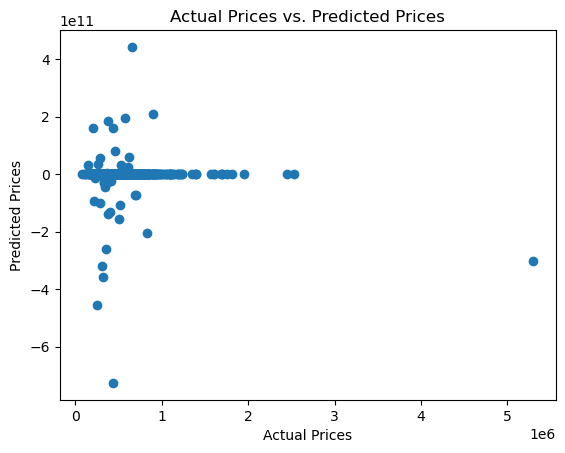

In [33]:
import matplotlib.pyplot as plt

# Visualize predicted prices versus actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()
